In [1]:
import sys
sys.path.append('../..')

import ferry_tickets.src.ferry_analysis as an

import pandas as pd

In [2]:
# Read in processed data from csv
df = pd.read_csv('../data/processed/ferry_ticket_data.csv')
df.head()

,_id,Timestamp,Redemption Count,Sales Count,is_weekend,is_today,is_latest
0,1,2025-06-02 10:45:00,152,137,False,True,True
1,2,2025-06-02 10:30:00,85,88,False,True,True
2,3,2025-06-02 10:15:00,184,200,False,True,True
3,4,2025-06-02 10:00:00,107,79,False,True,True
4,5,2025-06-02 09:45:00,69,73,False,True,True



---

In [3]:
# Add time-based features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['date'] = df['Timestamp'].dt.date
df['month'] = df['Timestamp'].dt.month
df['year'] = df['Timestamp'].dt.year
df['season'] = pd.cut(
    df['Timestamp'].dt.month, 
    bins=[0,3,6,9,12], 
    labels=['Winter', 'Spring', 'Summer', 'Fall']
)
df['hour'] = df['Timestamp'].dt.hour
df['day_of_week'] = df['Timestamp'].dt.day_name()


In [4]:
hourly = (df
    .groupby(
        ['season', 'day_of_week', 'date', 'hour'],
        observed=False
    )
    .agg({
        'Sales Count': 'sum',
        'Redemption Count': 'sum'
    })
    .reset_index()
)
hourly

,season,day_of_week,date,hour,Sales Count,Redemption Count
0,Winter,Friday,2015-05-01,0,0,0
1,Winter,Friday,2015-05-01,1,0,0
2,Winter,Friday,2015-05-01,2,0,0
3,Winter,Friday,2015-05-01,3,0,0
4,Winter,Friday,2015-05-01,4,0,0
...,...,...,...,...,...,...
2472955,Fall,Wednesday,2025-06-02,19,0,0
2472956,Fall,Wednesday,2025-06-02,20,0,0
2472957,Fall,Wednesday,2025-06-02,21,0,0
2472958,Fall,Wednesday,2025-06-02,22,0,0


In [5]:
hourly.index

RangeIndex(start=0, stop=2472960, step=1)

In [6]:
def isItPeak(
        df: pd.DataFrame,
        groupby_cols: list,
        col_name: str = 'isMax',
        value_col: str = 'Redemption Count'
    ) -> pd.DataFrame:
    result = df.copy()
    result[col_name] = result.index.isin(
        result.groupby(groupby_cols)[value_col].idxmax()
    )
    return result

In [7]:
hourly['year'] = pd.to_datetime(hourly['date']).dt.year

In [8]:
hourly

,season,day_of_week,date,hour,Sales Count,Redemption Count,year
0,Winter,Friday,2015-05-01,0,0,0,2015
1,Winter,Friday,2015-05-01,1,0,0,2015
2,Winter,Friday,2015-05-01,2,0,0,2015
3,Winter,Friday,2015-05-01,3,0,0,2015
4,Winter,Friday,2015-05-01,4,0,0,2015
...,...,...,...,...,...,...,...
2472955,Fall,Wednesday,2025-06-02,19,0,0,2025
2472956,Fall,Wednesday,2025-06-02,20,0,0,2025
2472957,Fall,Wednesday,2025-06-02,21,0,0,2025
2472958,Fall,Wednesday,2025-06-02,22,0,0,2025


In [9]:
isItPeak(hourly, ['year', 'season'], 'isMaxSeasonYear')

/var/folders/br/_k62f9c53h5bc9905_v1l3j80000gp/T/ipykernel_8014/862717270.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result.groupby(groupby_cols)[value_col].idxmax()


,season,day_of_week,date,hour,Sales Count,Redemption Count,year,isMaxSeasonYear
0,Winter,Friday,2015-05-01,0,0,0,2015,True
1,Winter,Friday,2015-05-01,1,0,0,2015,False
2,Winter,Friday,2015-05-01,2,0,0,2015,False
3,Winter,Friday,2015-05-01,3,0,0,2015,False
4,Winter,Friday,2015-05-01,4,0,0,2015,False
...,...,...,...,...,...,...,...,...
2472955,Fall,Wednesday,2025-06-02,19,0,0,2025,False
2472956,Fall,Wednesday,2025-06-02,20,0,0,2025,False
2472957,Fall,Wednesday,2025-06-02,21,0,0,2025,False
2472958,Fall,Wednesday,2025-06-02,22,0,0,2025,False


In [10]:
hourly

,season,day_of_week,date,hour,Sales Count,Redemption Count,year
0,Winter,Friday,2015-05-01,0,0,0,2015
1,Winter,Friday,2015-05-01,1,0,0,2015
2,Winter,Friday,2015-05-01,2,0,0,2015
3,Winter,Friday,2015-05-01,3,0,0,2015
4,Winter,Friday,2015-05-01,4,0,0,2015
...,...,...,...,...,...,...,...
2472955,Fall,Wednesday,2025-06-02,19,0,0,2025
2472956,Fall,Wednesday,2025-06-02,20,0,0,2025
2472957,Fall,Wednesday,2025-06-02,21,0,0,2025
2472958,Fall,Wednesday,2025-06-02,22,0,0,2025


In [11]:
# Update saved hourly data
hourly.to_csv(
    '../data/processed/hourly_ferry.csv',
    header=True,
    index=False
)


---


In [12]:
# Use script to generate analyses
analyses = an.analyze_ferry_patterns(df)


/Users/taniab/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/taniab/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


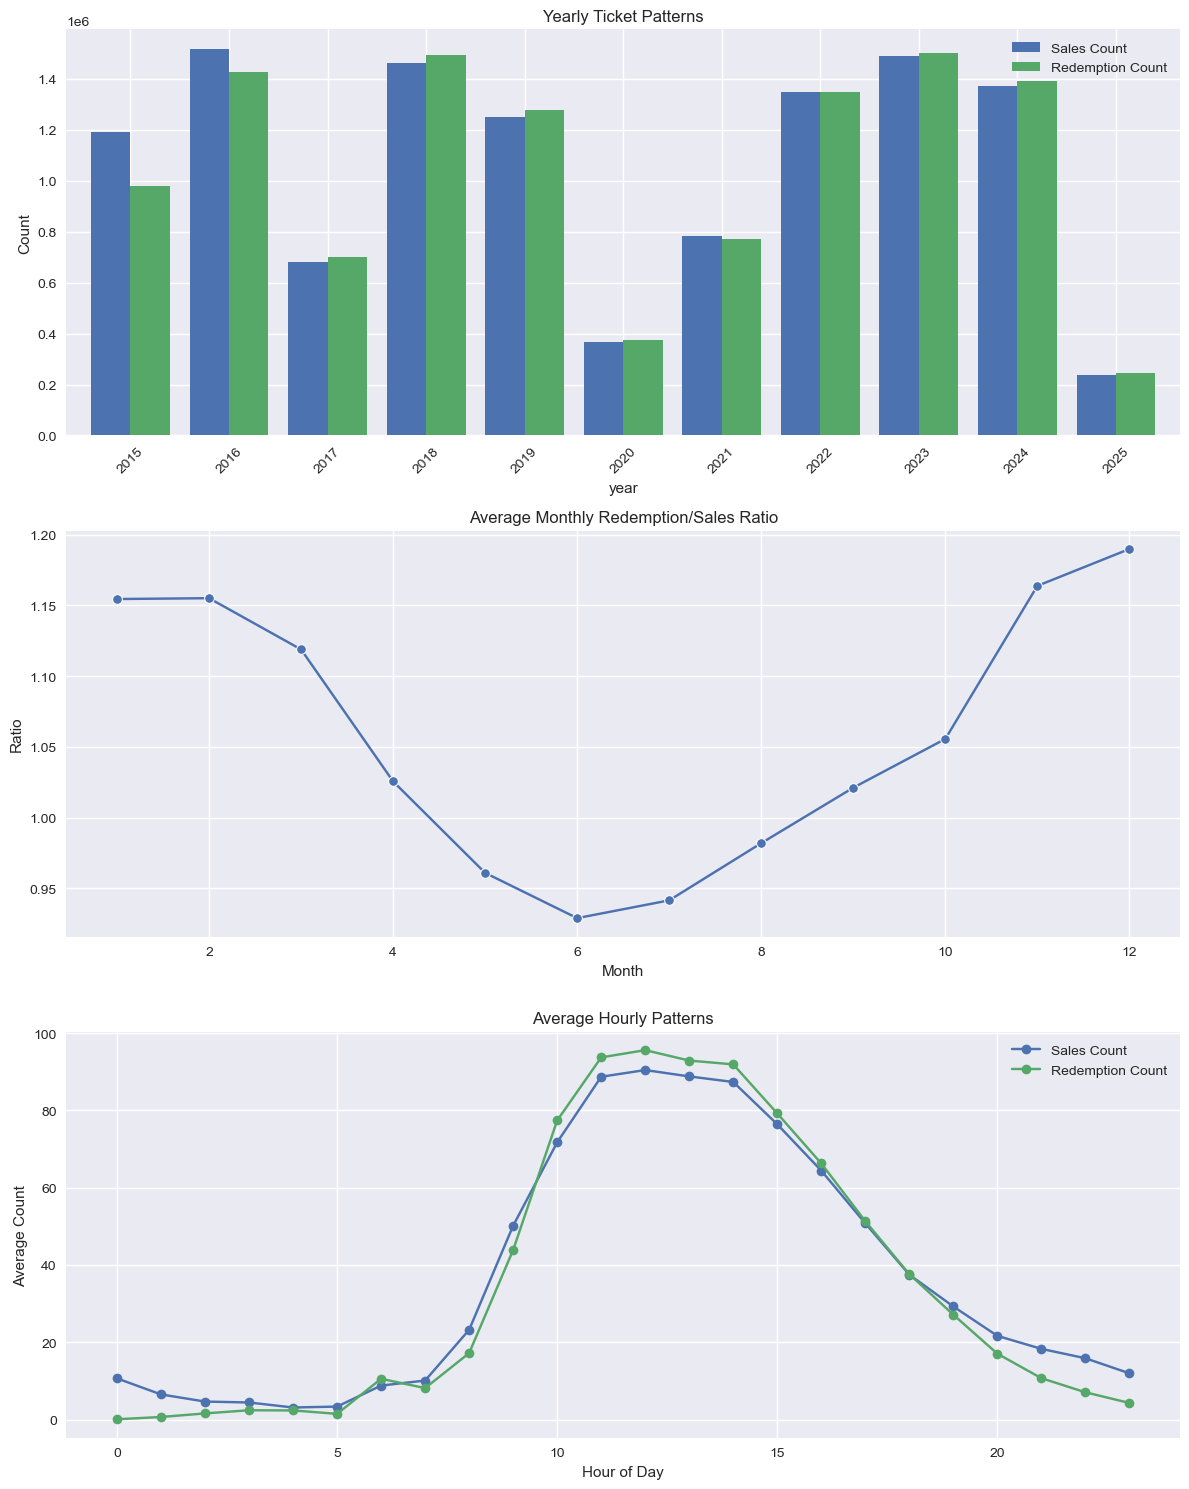

In [13]:
fig1 = an.plot_patterns(analyses)


In [14]:
insights = an.generate_insights(analyses)
insights

{'years_with_excess_redemptions': [2017,
  2018,
  2019,
  2020,
  2022,
  2023,
  2024,
  2025],
 'max_redemption_ratio': {'value': 1.0468300628642693, 'year': 2025},
 'avg_monthly_ratio': 1.0563323689055821,
 'peak_hour': {'redemptions': 12, 'sales': 12}}

In [15]:

# Create monthly aggregations
monthly_stats = df.groupby(['year', 'month'], observed=True).agg({
    'Sales Count': 'sum',
    'Redemption Count': 'sum'
}).reset_index()

# Calculate monthly averages by season
seasonal_patterns = df.groupby(['season', 'month'], observed=True).agg({
    'Sales Count': 'mean',
    'Redemption Count': 'mean'
}).round(2)

In [16]:
# Peak usage analysis by season
seasonal_hourly = df.groupby(['season', 'hour'], observed=True).agg({
    'Sales Count': 'mean',
    'Redemption Count': 'mean'
}).round(2)

# Find peak hours for each season
peak_hours = seasonal_hourly.groupby('season', observed=True)['Redemption Count'].idxmax()

In [17]:
# Calculate year-over-year growth
yearly_stats = df.groupby('year')[['Sales Count', 'Redemption Count']].sum()
yearly_growth = yearly_stats.pct_change() * 100

In [18]:
# Calculate YoY growth for each month
monthly_stats['previous_year_sales'] = monthly_stats.groupby('month')['Sales Count'].shift(1)
monthly_stats['yoy_growth'] = ((monthly_stats['Sales Count'] - monthly_stats['previous_year_sales']) 
                              / monthly_stats['previous_year_sales'] * 100).round(2)

In [19]:
yearly_stats

,Sales Count,Redemption Count
year,,
2015,1189620,978707
2016,1518428,1425779
2017,682346,698861
2018,1463589,1493560
2019,1249725,1278505
2020,366606,374546
2021,782368,773040
2022,1346659,1349778
2023,1491473,1502883


In [20]:
yearly_growth

,Sales Count,Redemption Count
year,,
2015,NaN,NaN
2016,27.639751,45.679861
2017,-55.062341,-50.983918
2018,114.493673,113.713457
2019,-14.612299,-14.398819
2020,-70.665066,-70.704377
2021,113.408400,106.393874
2022,72.126033,74.606489
2023,10.753576,11.342976
